In [1]:
import pandas as pd
df = pd.DataFrame()
for i in range(1,4):
    df = df.append(pd.read_csv(r"C:\Users\samue\OneDrive - HKUST Connect\year 2 spring\UROP 1100\UROP-1100-21S\topic_classification\data\news\articles" + str(i) + '.csv'))
df = df.iloc[:, 1:]
df.head(5)

C:\Users\samue\AppData\Local\Temp\ipykernel_20680\2606955069.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_csv(r"C:\Users\samue\OneDrive - HKUST Connect\year 2 spring\UROP 1100\UROP-1100-21S\topic_classification\data\news\articles" + str(i) + '.csv'))
C:\Users\samue\AppData\Local\Temp\ipykernel_20680\2606955069.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_csv(r"C:\Users\samue\OneDrive - HKUST Connect\year 2 spring\UROP 1100\UROP-1100-21S\topic_classification\data\news\articles" + str(i) + '.csv'))
C:\Users\samue\AppData\Local\Temp\ipykernel_20680\2606955069.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_csv(r"C:\Users\samue\OneDrive - HKU

,id,title,publication,author,date,year,month,url,content
0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


In [2]:
df = df[['title', 'content', 'publication']]
df.head(3)

,title,content,publication
0,House Republicans Fret About Winning Their Hea...,WASHINGTON — Congressional Republicans have...,New York Times
1,Rift Between Officers and Residents as Killing...,"After the bullet shells get counted, the blood...",New York Times
2,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...","When Walt Disney’s “Bambi” opened in 1942, cri...",New York Times


### Fetch all media bias and store as a dictionary

In [2]:
from fetch_media_bias import *
media_bias = {}
for media in set(df.publication):
    media_bias[media] = fetch_media_bias(media)
media_bias

{'Atlantic': 'left-center',
 'New York Post': 'right',
 'CNN': 'left',
 'Guardian': 'left-center',
 'Washington Post': 'left-center',
 'Business Insider': False,
 'Vox': 'left',
 'Fox News': 'right',
 'Buzzfeed News': 'left',
 'National Review': 'right',
 'NPR': 'left-center',
 'Reuters': 'center',
 'Breitbart': 'right',
 'Talking Points Memo': False,
 'New York Times': 'left-center'}

In [3]:
def add_bias_column(media):
    return media_bias[media]
df['media_bias'] = df['publication'].apply(add_bias_column)
# remove bias = False
df = df[df['media_bias'] != False]
df = df.dropna()
df.head(3)

,id,title,publication,author,date,year,month,url,content,media_bias
7012,82596,Donald Trump blasts Bill Clinton as ’one of th...,Fox News,Christopher Snyder,2015-12-30,2015.0,12.0,https://web.archive.org/web/20160101000951/htt...,Donald Trump launched new attacks against Bil...,right
7016,82600,"Drop in oil prices rocks producer states, trig...",Fox News,Brooke Singman,2016-01-01,2016.0,1.0,https://web.archive.org/web/20160102032517/htt...,The plunge in oil prices has given a needed b...,right
7020,82605,Open carry comes to Texas: Why the Lone Star s...,Fox News,John R Lott,2015-12-30,2015.0,12.0,https://web.archive.org/web/20160102032517/htt...,"With about 900, 000 concealed handgun permit ...",right


(<AxesSubplot:>, (75288, 10))

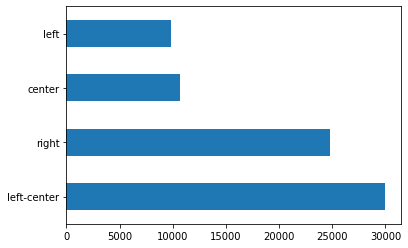

In [4]:
df.media_bias.value_counts().plot(kind='barh'), df.shape

In [6]:
text = list(df['title'] + ' ' + df['content'])
text[:1]

['Donald Trump blasts Bill Clinton as ’one of the great abusers of the world’  Donald Trump launched new attacks against Bill and Hillary Clinton Wednesday as the war of words between both campaigns heated up. The GOP hopeful told about 2, 000 supporters in Hilton Head Island, S. C. that he was forced to fight back against the Clinton camp after the Democratic frontrunner accused him of displaying a ”penchant for sexism.” Trump blasted the former president, saying, ”And [Hillary] wants to accuse me of things. And the husband’s one of the great abusers of the world. Give me a break. Give me a break. Give me a break.” ”She came out saying [Trump] has a ‘penchant for sexism’  …     now she is playing with that card,” Trump explained. ”I had no choice, but I had to mention her husband’s situation,” a reference to Bill Clinton’s previous extramarital relationships. On Tuesday, Trump told reporters that Bill Clinton’s past is in play during the election. “Hillary brought up the whole thing w

In [7]:
from joblib import load
clf = load(r'C:\Users\samue\OneDrive - HKUST Connect\year 2 spring\UROP 1100\UROP-1100-21S\topic_classification\traditional_ml\model\svm.joblib')
labels = clf.predict(text)
labels[:5]

array(['POLITICS', 'BUSINESS', 'POLITICS', 'POLITICS', 'POLITICS'],
      dtype=object)

In [8]:
df['label'] = labels
print(df.shape)
df.sample(10)

(75288, 11)


,id,title,publication,author,date,year,month,url,content,media_bias,label
34490,131331,In-N-Out is no longer America’s favorite burge...,New York Post,Fox News,2017-05-18,2017.0,5.0,https://web.archive.org/web/20170519002915/htt...,Five Guys has unseated for the title of Ame...,right,FOOD & DRINK
19946,109184,What You Don’t Know About Your Medical Record...,Buzzfeed News,Stephanie M. Lee,2016-08-04,2016.0,8.0,https://web.archive.org/web/20160804215125/htt...,The United States has poured billions into di...,left,WELLNESS
20644,185338,"Oil plummets to $29, dragging world stocks lower",Reuters,Herbert Lash,2016-01-15,2016.0,1.0,http://www.reuters.com/article/us-global-marke...,Oil prices plummeted to $29 a barrel on Frida...,center,BUSINESS
29002,199707,How the anti-vaccine movement infiltrated Robe...,Vox,Julia Belluz,2016/3/28,2016.0,3.0,http://www.vox.com/2016/3/28/11317718/robert-d...,"Over the weekend, science collided hard with ...",left,WELLNESS
4655,161676,"Super Bowl Ads 2017: What Works, What Doesn’t ...",NPR,Eric Deggans,2017-02-04,2017.0,2.0,http://www.npr.org/2017/02/04/513313861/super-...,"In today’s media climate, who has time to wa...",left-center,ENTERTAINMENT
34034,207236,Trump to sign executive order making it easier...,Washington Post,John Wagner,2017-05-03,2017.0,5.0,https://web.archive.org/web/20170504014212/htt...,President Trump on Thursday plans to relax en...,left-center,POLITICS
39605,214292,Trump’s latest outrageous statement wasn’t a ‘...,Washington Post,Paul Waldman,2016-08-10,2016.0,8.0,https://web.archive.org/web/20160811004119/htt...,A day after dutifully reading a polic...,left-center,POLITICS
30696,126457,Fire erupts inside Trump International Hotel,New York Post,Yaron Steinbuch and Khristina Narizhnaya,2017-03-03,2017.0,3.0,https://web.archive.org/web/20170304014645/htt...,A fire broke out in an apartment under constru...,right,TRAVEL
24181,118097,Joy amid Terror,National Review,Kathryn Jean Lopez,2016-02-22,2016.0,2.0,http://www.nationalreview.com/article/431696/c...,‘Our identity is to live like Jesus Christ. ” ...,right,RELIGION
3402,157713,US Fed says June hike possible; UK employment ...,Guardian,Graeme Wearden,2017-05-25,2017.0,5.0,https://www.theguardian.com/business/live/2016...,And finally. .... here’s my colleage Jana Kasp...,left-center,BUSINESS


In [96]:
df_politics = df[df['label'] == "POLITICS"]
df_politics.sample(10)

,title,content,publication,media_bias,label
4752,Trump to Announce Carrier Plant Will Keep Jobs...,"From the earliest days of his campaign, Donald...",New York Times,left-center,POLITICS
19267,Minimum Wage Will Rise To $15 In New York,The minimum wage in New York City will rise t...,Buzzfeed News,left,POLITICS
10728,Key lawmaker wants answers from Comey on Clint...,"In a letter to Comey, Senate Homeland Security...",Fox News,right,POLITICS
8826,"Kasich, Cruz still picking up delegates, votes...",Despite suspending their presidential campaig...,Fox News,right,POLITICS
28242,"Jeb Bush: Temporary Muslim Ban ’Horrific,’ Ill...",Everything wrong with Jeb Bush can be summed u...,Breitbart,right,POLITICS
19135,Manning leaves prison to a U.S. more accepting...,"Chelsea Manning, the U. S. Army soldier respo...",Reuters,center,POLITICS
6990,Donald Trump’s False Bragging About His Charit...,Even the most unsparing critic of the news med...,Atlantic,left-center,POLITICS
29909,How Southern racism found a home in the Tea Party,Within days of President Obama’s inauguration...,Vox,left,POLITICS
29352,CNN’s Camerota: There Wasn’t Line Between Stat...,"On Monday’s broadcast of CNN’s “New Day,” Al...",Breitbart,right,POLITICS
14214,Exclusive — Progressives Plan to Storm Trump-L...,"SARASOTA, Florida — Thousands of profession...",Breitbart,right,POLITICS


In [9]:
df.to_csv("labelled_news_data.csv", index=False)

### Generate Wordcloud with Left Bias

In [102]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = '. '.join(list(df[df['media_bias'] == "left"].content))

word_cloud = WordCloud(collocations = False, background_color = 'white', width=2000, height=1000).generate(text)

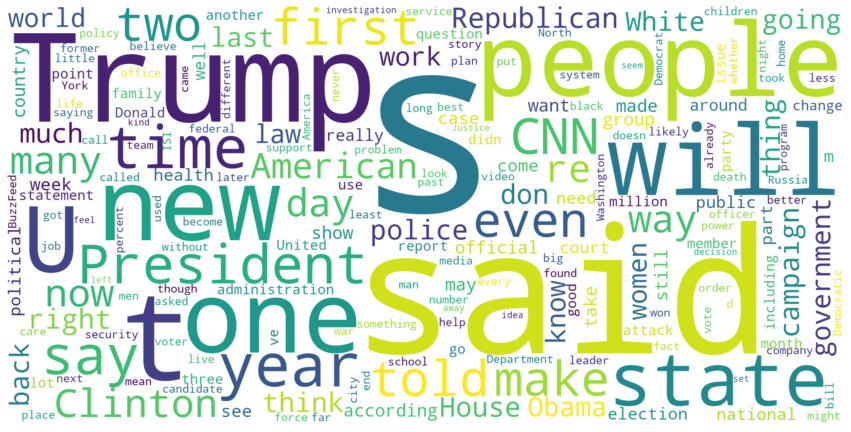

In [103]:
plt.figure(figsize=(15, 15))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Generate Wordcloud with Right Bias

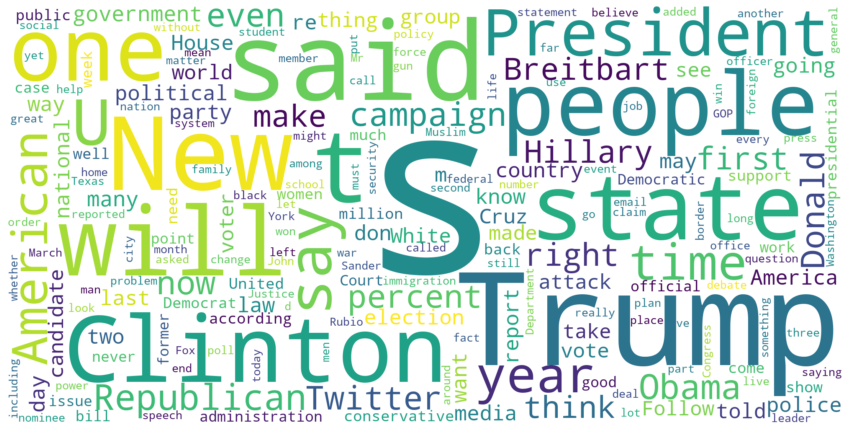

In [104]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = '. '.join(list(df[df['media_bias'] == "right"].content))

word_cloud = WordCloud(collocations = False, background_color = 'white', width=2000, height=1000).generate(text)

plt.figure(figsize=(15, 15))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()